In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('data_science_000000000000.csv')
data2 = pd.read_csv('data_science_000000000001.csv')
data3 = pd.read_csv('data_science_000000000002.csv')
data4 = pd.read_csv('data_science_000000000003.csv')
data5 = pd.read_csv('data_science_000000000004.csv')
data6 = pd.read_csv('data_science_000000000005.csv')
data = pd.concat([data1,data2,data3,data4,data5,data6])

data.shape

(12431198, 5)

In [3]:
data.head()

,iot_id,city,country,timestamp,event
0,SFO71ALjNqHhVjDI,Austin,United States,2019-04-11 11:22:13 UTC,module_cellular_connection_lost
1,qwC1O6MZuo9/Rs/z,Tempe,United States,2019-04-11 11:22:12 UTC,module_cellular_connection_established
2,HxqBFzpqCId6kQsl,Austin,United States,2019-04-11 11:22:12 UTC,module_cellular_connection_lost
3,SpAy7v2RytzH4zc6,Santa Monica,United States,2019-04-11 11:22:12 UTC,module_cellular_connection_established
4,TmRWpMXtvxOMWB4f,Austin,United States,2019-04-11 11:22:12 UTC,module_cellular_connection_established


In [4]:
data.event.value_counts()

module_cellular_connection_established    6216196
module_cellular_connection_lost           6215002
Name: event, dtype: int64

In [5]:
us_data = data[(data.timestamp > '2019-02-28 23:59:59 UTC') & (data.timestamp < '2019-03-16 00:00:00 UTC')]
us_data_austin = us_data[(us_data.country == 'United States') & (us_data.city == 'Austin')]
us_data_austin.shape

(471493, 5)

In [6]:
#3 Worst performing iotids in terms of disconnetions
dcnts = us_data_austin.iot_id.value_counts()
dcnts = dcnts[dcnts.values > dcnts.mean() + 3 * dcnts.std() ]
dcnts.shape

(31,)

In [7]:
# uids = us_data_austin.iot_id.unique()
# uids.shape

In [8]:
s_dates = ['2019-03-%s 00:00:00 UTC'%('0'+str(i)) if i< 10 else '2019-03-%s 00:00:00 UTC'%i for i in range(1,16)]
e_dates = ['2019-03-%s 23:59:59 UTC'%('0'+str(i)) if i< 10 else '2019-03-%s 23:59:59 UTC'%i for i in range(1,16)]

In [9]:
# Calculation for disconnetion times
#How long does a disconnect last on average, has it changed over time?
each_day_avg_dict = {}
# For each day
for sd,ed in zip(s_dates,e_dates):
    print(sd,ed)
    for id in dcnts.index:
        # Extract disconnetion data for this day and this iot id
        d_uiot_td = us_data_austin[((us_data_austin.timestamp > sd) & ( us_data_austin.timestamp < ed )) & (us_data_austin.iot_id == id)]
        # Since the data is in reverse order i.e events come in last first, reverse the dataset
        d_uiot_td = d_uiot_td[::-1]
        d_uiot_td.reset_index(drop=True,inplace = True)
        # If no data, pass
        if d_uiot_td.shape != (0, 5):
            #print(i,d_uiot_td.head(1))
            
            dt_times_s_iotid = []
            
            # If first event is connection established, drop it, as we need lost connection to be first event
            if d_uiot_td.head(1)['event'][0]  == 'module_cellular_connection_established':
                d_uiot_td.drop(d_uiot_td.index[0],inplace = True)
        
            # Similarly drop last lost connection as we won't have re-connection on same day
            try:
                if d_uiot_td.tail(1)['event'].values[0] == 'module_cellular_connection_lost':
                    d_uiot_td.drop(d_uiot_td.index[-1],inplace = True)
            except:
                d_uiot_td.shape
            
            d_uiot_td.reset_index(drop=True,inplace = True)
            
            # take 2 continuous events and find the time diff b/w them, i.e the time diff b/w lost conection and re-connection
            for j in range(0,d_uiot_td.shape[0],2):
                dt = d_uiot_td.iloc[j:j+2,3:5]
                dt.reset_index(drop=True,inplace = True)

                if dt.iloc[0,1] == 'module_cellular_connection_lost' and dt.iloc[1,1] == 'module_cellular_connection_established':
                    d2 = ' '.join(dt.iloc[1,0].split()[:-1])
                    d1 = ' '.join(dt.iloc[0,0].split()[:-1])
                    disct = datetime.strptime(d2, '%Y-%m-%d %H:%M:%S')-datetime.strptime(d1, '%Y-%m-%d %H:%M:%S')
                    dt_times_s_iotid.append(disct)
                else:
                    pass
                    #print("DT is not in right order",dt.iloc[0,0],dt.iloc[0,1])
#             print("current iotid %s on this date %s is %s "% (id,sd,dt_times_s_iotid))
            if len(dt_times_s_iotid) != 0:
                each_day_avg_dict[(sd,ed,id)] = dt_times_s_iotid
            
#print(set([i[2] for i in each_day_avg_dict.keys()]))
# print("*" *20)
# print(each_day_avg_dict)

# print("*" *20)
# print(each_day_avg_dict.keys())

2019-03-01 00:00:00 UTC 2019-03-01 23:59:59 UTC
2019-03-02 00:00:00 UTC 2019-03-02 23:59:59 UTC
2019-03-03 00:00:00 UTC 2019-03-03 23:59:59 UTC
2019-03-04 00:00:00 UTC 2019-03-04 23:59:59 UTC
2019-03-05 00:00:00 UTC 2019-03-05 23:59:59 UTC
2019-03-06 00:00:00 UTC 2019-03-06 23:59:59 UTC
2019-03-07 00:00:00 UTC 2019-03-07 23:59:59 UTC
2019-03-08 00:00:00 UTC 2019-03-08 23:59:59 UTC
2019-03-09 00:00:00 UTC 2019-03-09 23:59:59 UTC
2019-03-10 00:00:00 UTC 2019-03-10 23:59:59 UTC
2019-03-11 00:00:00 UTC 2019-03-11 23:59:59 UTC
2019-03-12 00:00:00 UTC 2019-03-12 23:59:59 UTC
2019-03-13 00:00:00 UTC 2019-03-13 23:59:59 UTC
2019-03-14 00:00:00 UTC 2019-03-14 23:59:59 UTC
2019-03-15 00:00:00 UTC 2019-03-15 23:59:59 UTC
{'jtrY+zp4a9v9JkUp', 'GVEuIZbR0t/Oue5U', 'CPY9eglQDZWGb4AW', 'o5tRO+ovc4x2NWqx', '/KBmQwYeeu5yamuL', 'N7qc58eDNzhFN7L+', 'Bv2tnTQ80abyUMCb', 'A72SYqTZ8pv5WSmw', 'a3nQRSgF7v1dwC8W', '8/rdsYd1Eu7egOjH', 'HuHww9eFcAQJF3g0', 'u2ZbJd47EB0ZcRjj', 'sOeO/Uj76y1+CDL4', 'XyUot7MV1w3ISxCx',

In [10]:
#avg dt each day in hours
avg_dts = [] 
for sd,ed in zip(s_dates,e_dates):
    s = 0
    for uid in dcnts.index: 
        try:
            for dt in each_day_avg_dict[(sd,ed,uid)]:
                s = s + dt.total_seconds()
        except:
            pass
#     print("s is ",sd,ed,((s/2).total_seconds())/3600,s)
#     print(s/(3600*len(dcnts.index)))
    avg_dts.append(s/(3600*len(set([i[2] for i in each_day_avg_dict.keys()]))))

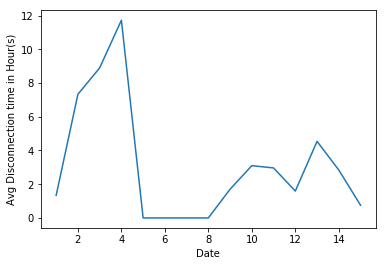

In [11]:
plt.plot(range(1,16),avg_dts)
plt.xlabel('Date')
plt.ylabel('Avg Disconnection time in Hour(s)')
plt.show()

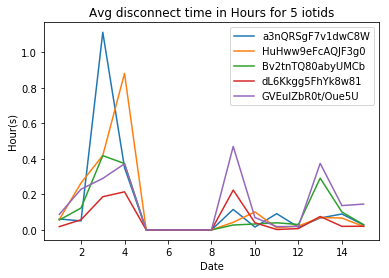

In [23]:
avg_dts_uids = pd.DataFrame(columns = ['sd','ed','uid','avg_dt_uid'])
for uid in dcnts.index[:5]:
    s = 0
    for sd,ed in zip(s_dates,e_dates): 
        try:
            for dt in each_day_avg_dict[(sd,ed,uid)]:
                s = s + dt.total_seconds()
#             print(sd,ed,uid,s,len(each_day_avg_dict[(sd,ed,uid)]),s/len(each_day_avg_dict[(sd,ed,uid)]))
            s = s/(3600)
#             print(sd,ed,uid,s/len(each_day_avg_dict[(sd,ed,uid)]))
            avg_dts_uids= avg_dts_uids.append({'sd':sd,'ed':ed,'uid':uid,'avg_dt_uid':s/len(each_day_avg_dict[(sd,ed,uid)])}, ignore_index=True)
        except:
            avg_dts_uids= avg_dts_uids.append({'sd':sd,'ed':ed,'uid':uid,'avg_dt_uid':0}, ignore_index=True)
#     print("s is ",sd,ed,((s/2).total_seconds())/3600,s)
#     print(s/7200)
#     avg_dts.append(s/7200)
for i in avg_dts_uids.uid.unique():
    plt.plot(range(1,16),(avg_dts_uids[avg_dts_uids.uid == i]['avg_dt_uid']),label=i)
    plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Hour(s)')
plt.title('Avg disconnect time in Hours for 5 iotids')
plt.show()
# plt.plot(range(1,16),(avg_dts_uids[avg_dts_uids.uid == 'N+2AIzq4J4qpaRv3']['avg_dt_uid']))

In [13]:
# Calculation for avg connection alive time
each_day_avg_dict1 = {}
# For each day
for sd,ed in zip(s_dates,e_dates):
    print(sd,ed)
    for iotid in dcnts.index:
        # Extract disconnetion data for this day and this iot id
        d_uiot_td = us_data_austin[((us_data_austin.timestamp > sd) & ( us_data_austin.timestamp < ed )) & (us_data_austin.iot_id == iotid)]
        # Since the data is in reverse order i.e events come in last first, reverse the dataset
        
        d_uiot_td = d_uiot_td[::-1]
        d_uiot_td.reset_index(drop=True,inplace = True)
        
        # If no data, pass
        if d_uiot_td.shape != (0, 5):
            
            dt_times_s_iotid = []
            
            # If first event is connection dropped, drop it, as we need lost connection to be first event
            if d_uiot_td.head(1)['event'][0]  == 'module_cellular_connection_lost':
                d_uiot_td.drop(d_uiot_td.index[0],inplace = True)
        
            # Similarly drop last lost connection as we won't have re-connection on same day
            try:
                if d_uiot_td.tail(1)['event'].values[0] == 'module_cellular_connection_established':
                    d_uiot_td.drop(d_uiot_td.index[-1],inplace = True)
            except:
                d_uiot_td.shape
            
            d_uiot_td.reset_index(drop=True,inplace = True)
            
#             print(sd,ed,id,d_uiot_td)
            # take 2 continuous events and find the time diff b/w them, i.e the time diff b/w lost conection and re-connection
            for j in range(0,d_uiot_td.shape[0],2):
                dt = d_uiot_td.iloc[j:j+2,3:5]
                dt.reset_index(drop=True,inplace = True)
                
                if dt.shape == (1, 2):
                    #print(dt.shape)
                    continue
                if dt.iloc[0,1] == 'module_cellular_connection_established' and dt.iloc[1,1] == 'module_cellular_connection_lost':
                    d2 = ' '.join(dt.iloc[1,0].split()[:-1])
                    d1 = ' '.join(dt.iloc[0,0].split()[:-1])
                    ct = datetime.strptime(d2, '%Y-%m-%d %H:%M:%S')-datetime.strptime(d1, '%Y-%m-%d %H:%M:%S')
                    dt_times_s_iotid.append(ct)
                else:
                    pass
                    #print("DT is not in right order",dt.iloc[0,0],dt.iloc[0,1])
#             print("current iotid %s on this date %s is %s "% (id,sd,dt_times_s_iotid))
            if len(dt_times_s_iotid) != 0:
                each_day_avg_dict1[(sd,ed,iotid)] = dt_times_s_iotid

#print(set([i[2] for i in each_day_avg_dict1.keys()]))

2019-03-01 00:00:00 UTC 2019-03-01 23:59:59 UTC
2019-03-02 00:00:00 UTC 2019-03-02 23:59:59 UTC
2019-03-03 00:00:00 UTC 2019-03-03 23:59:59 UTC
2019-03-04 00:00:00 UTC 2019-03-04 23:59:59 UTC
2019-03-05 00:00:00 UTC 2019-03-05 23:59:59 UTC
2019-03-06 00:00:00 UTC 2019-03-06 23:59:59 UTC
2019-03-07 00:00:00 UTC 2019-03-07 23:59:59 UTC
2019-03-08 00:00:00 UTC 2019-03-08 23:59:59 UTC
2019-03-09 00:00:00 UTC 2019-03-09 23:59:59 UTC
2019-03-10 00:00:00 UTC 2019-03-10 23:59:59 UTC
2019-03-11 00:00:00 UTC 2019-03-11 23:59:59 UTC
2019-03-12 00:00:00 UTC 2019-03-12 23:59:59 UTC
2019-03-13 00:00:00 UTC 2019-03-13 23:59:59 UTC
2019-03-14 00:00:00 UTC 2019-03-14 23:59:59 UTC
2019-03-15 00:00:00 UTC 2019-03-15 23:59:59 UTC


In [14]:
#avg dt each day in hours
avg_cts = [] 
for sd,ed in zip(s_dates,e_dates):
    s = 0
    for uid in dcnts.index: 
        try:
            for dt in each_day_avg_dict1[(sd,ed,uid)]:
                s = s + dt.total_seconds()
        except:
            pass
    avg_cts.append(s/(3600*len(set([i[2] for i in each_day_avg_dict1.keys()]))))

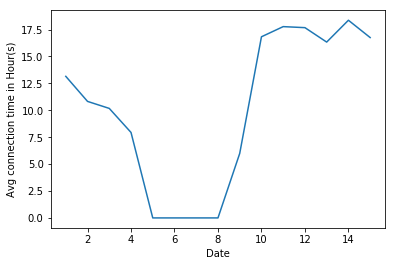

In [15]:
plt.plot(range(1,16),avg_cts)
plt.xlabel('Date')
plt.ylabel('Avg connection time in Hour(s)')
plt.show()

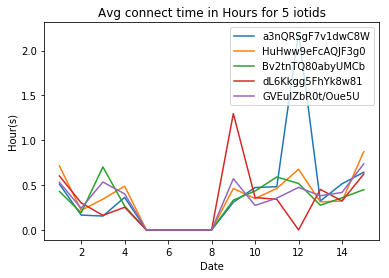

In [16]:
avg_cts_uids = pd.DataFrame(columns = ['sd','ed','uid','avg_dt_uid'])
for uid in dcnts.index[:5]:
    s = 0
    for sd,ed in zip(s_dates,e_dates): 
        try:
            for dt in each_day_avg_dict1[(sd,ed,uid)]:
                s = s + dt.total_seconds()
#             print(sd,ed,uid,s,len(each_day_avg_dict[(sd,ed,uid)]),s/len(each_day_avg_dict[(sd,ed,uid)]))
            s = s/(3600)
#             print(sd,ed,uid,s/len(each_day_avg_dict[(sd,ed,uid)]))
            avg_cts_uids= avg_cts_uids.append({'sd':sd,'ed':ed,'uid':uid,'avg_dt_uid':s/len(each_day_avg_dict[(sd,ed,uid)])}, ignore_index=True)
        except:
            avg_cts_uids= avg_cts_uids.append({'sd':sd,'ed':ed,'uid':uid,'avg_dt_uid':0}, ignore_index=True)
#     print("s is ",sd,ed,((s/2).total_seconds())/3600,s)
#     print(s/7200)
#     avg_dts.append(s/7200)
for i in avg_cts_uids.uid.unique():
    plt.plot(range(1,16),(avg_cts_uids[avg_cts_uids.uid == i]['avg_dt_uid']),label=i)
    plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Hour(s)')
plt.title('Avg connect time in Hours for 5 iotids')
plt.show()

In [17]:
#2Any patterns in disconnects? For example lot's of disconnects in the same city at the same time of the day.
us_data_austin_lcns = us_data_austin[us_data_austin.event == 'module_cellular_connection_lost']

In [18]:
td = '2019-03-%s %s:00:00 UTC'
date_h = []

for d in range(1,16):
    for h in range(0,24):
        if d < 10:
            k = '0' + str(d)
        else:
            k = d
        if h < 10:
            h = '0' + str(h)
        date_h.append(td % (k,h))

In [19]:
dcts = {}
for i in range(len(date_h)):
    if i == 359:
        dcts[date_h[i]] = us_data_austin_lcns[(us_data_austin_lcns.timestamp > date_h[i]) & (us_data_austin_lcns.timestamp < '2019-03-16 00:00:00 UTC') ].shape[0]
    else:
        dcts[date_h[i]] = us_data_austin_lcns[(us_data_austin_lcns.timestamp > date_h[i]) & (us_data_austin_lcns.timestamp < date_h[i+1]) ].shape[0]

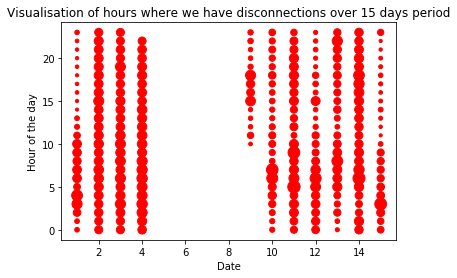

In [20]:
import matplotlib.pyplot as plt
x = [1]*24 + [2]*24 +[3]*24 +[4]*24 +[5]*24 +[6]*24 +[7]*24 + [8]*24 + [9]*24 +[10]*24 +[11]*24 +[12]*24 +[13]*24 + [14]*24 + [15]*24
y = list(range(24)) + list(range(24)) + list(range(24)) + list(range(24)) + list(range(24))+list(range(24)) + list(range(24))+list(range(24)) + list(range(24))+ list(range(24)) + list(range(24))+list(range(24)) + list(range(24))+list(range(24)) + list(range(24))
dcts_s = [i/15 for i in dcts.values()]
# Scatterplot where size of dot shows the undersupply amount, bigger the dot more undersupply
plt.scatter(x,y,s=dcts_s, color='red')
plt.xlabel('Date')
plt.ylabel('Hour of the day')
plt.title('Visualisation of hours where we have disconnections over 15 days period')
plt.show()

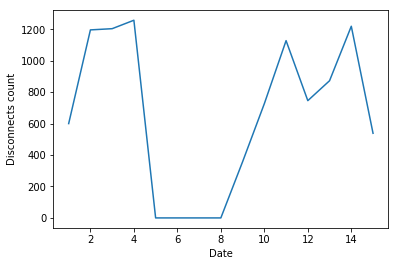

In [21]:
# avg dcnts each hour for first 15 days of March
avg_dcnts_ev_h = []
days = ['0'+ str(i) if i <10 else str(i) for i in range(1,16)]
for d in days:
    d_dcts = []
    for i in dcts.items():
#     print(i[0].split()[0].split('-')[2])
        if i[0].split()[0].split('-')[2] == d:
            d_dcts.append(i[1])
    avg_dcnts_ev_h.append(sum(d_dcts)/24)
#     print(sum(d_dcts)/24)
plt.plot(range(1,16),avg_dcnts_ev_h)
plt.xlabel('Date')
plt.ylabel('Disconnects count')
plt.show()

In [22]:
#3Any iot modules that behave differently than others in the same city? e.g disconnects more often or disconnects last longer
dcnts = us_data_austin_lcns.iot_id.value_counts()
dcnts[dcnts.values > dcnts.mean()+3 * dcnts.std()].index

Index(['a3nQRSgF7v1dwC8W', 'HuHww9eFcAQJF3g0', 'Bv2tnTQ80abyUMCb',
       'dL6Kkgg5FhYk8w81', 'GVEuIZbR0t/Oue5U', 'A82T9Up6V5ZPKqIp',
       'N7qc58eDNzhFN7L+', 'AS2+PDJIQGRr7GmP', 'kU+8u3l1uRJDcbfU',
       'u2ZbJd47EB0ZcRjj', 'zqo4mXjC5ircPoBH', '8/rdsYd1Eu7egOjH',
       'o5tRO+ovc4x2NWqx', 'jtrY+zp4a9v9JkUp', 'G2Zbuhxl9PDZYUlw',
       'j6Q/rs6S2q5XiNtw', '4AkDl60+48Uowa1K', 'jyVy1XesusnChrVN',
       '0rIcqYppDU6ABIXh', 'J4mzuldlDtema874', 'A+bubPN5dTUQcWt8',
       '1WbxUQQL+A84IDsO', 'sOeO/Uj76y1+CDL4', '6OQ6JubunOLGfqvt',
       'P9uiTqDDcXF9r//K', 'GNlDpVgQJ7sz8elr', 'A72SYqTZ8pv5WSmw',
       'XyUot7MV1w3ISxCx', 'CPY9eglQDZWGb4AW', 'J7wmtLqG0rc+i/xf',
       '/KBmQwYeeu5yamuL'],
      dtype='object')